In [47]:
import numpy as np
import pandas as pd

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import operator

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import NuSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
import catboost as cb

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(len(train),len(test))

1000000 25010


In [48]:
print(train.columns)

Index(['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'label'], dtype='object')


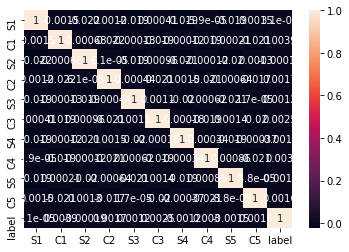

In [49]:
df = pd.DataFrame(train,columns=['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5','label'])

corrMatrix = df.corr()

sn.heatmap(corrMatrix, annot=True)
plt.show()

In [50]:
print(corrMatrix)

             S1        C1        S2        C2        S3        C3        S4  \
S1     1.000000 -0.001450 -0.021647  0.001212 -0.019335  0.000414 -0.019263   
C1    -0.001450  1.000000 -0.000679 -0.021512 -0.000133 -0.019390 -0.000118   
S2    -0.021647 -0.000679  1.000000  0.000061 -0.019172  0.000963 -0.020511   
C2     0.001212 -0.021512  0.000061  1.000000 -0.000438 -0.020856  0.001535   
S3    -0.019335 -0.000133 -0.019172 -0.000438  1.000000  0.001093 -0.019825   
C3     0.000414 -0.019390  0.000963 -0.020856  0.001093  1.000000 -0.000176   
S4    -0.019263 -0.000118 -0.020511  0.001535 -0.019825 -0.000176  1.000000   
C4    -0.000059 -0.018657 -0.000118 -0.020684  0.000623 -0.019029 -0.000339   
S5    -0.018926  0.000212 -0.020205 -0.000639 -0.020612  0.001361 -0.019475   
C5     0.001545 -0.021046  0.001309 -0.017275  0.000017 -0.020381 -0.000368   
label  0.000031  0.003877 -0.000195  0.001711  0.001194  0.002483 -0.001157   

             C4        S5        C5     label  
S1 

In [51]:
all_data = train

In [52]:
def bincount2D_vectorized(a):    
    N = a.max()+1
    a_offs = a + np.arange(a.shape[0])[:,None]*N
    return np.bincount(a_offs.ravel(), minlength=a.shape[0]*N).reshape(-1,N)

S = all_data.iloc[:,[0,2,4,6,8]].astype(int)
S = pd.DataFrame(bincount2D_vectorized(S.values),columns=['suit0','suit1','suit2','suit3','suit4'])
all_data = pd.merge(all_data, S, how='left', left_index=True, right_index=True).drop(['suit0'],axis=1)
#bincount starts counting from 0, but our suits start at 1.  Dropping suit0.

R = all_data.iloc[:,np.arange(1,10,2)].astype(int)
cols = ['rank{}'.format(x) for x in range(0,14,1)]
R = pd.DataFrame(bincount2D_vectorized(R.values),columns=cols)
all_data = pd.merge(all_data, R, how='left', left_index=True, right_index=True).drop(['rank0'],axis=1)
#bincount starts counting from 0, but our ranks start at 1.  Dropping rank0.

all_data.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,...,rank4,rank5,rank6,rank7,rank8,rank9,rank10,rank11,rank12,rank13
0,1,1,1,13,2,4,2,3,1,12,...,1,0,0,0,0,0,0,0,1,1
1,3,12,3,2,3,11,4,5,2,5,...,0,2,0,0,0,0,0,1,1,0
2,1,9,4,6,1,4,3,2,3,9,...,1,0,1,0,0,2,0,0,0,0
3,1,4,3,13,2,13,2,1,3,6,...,1,0,1,0,0,0,0,0,0,2
4,3,10,2,7,1,2,2,11,4,9,...,0,0,0,1,0,1,1,1,0,0


In [53]:
train = all_data

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X = train.drop(['label'],axis = 1)
Y = train['label']


x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.001, random_state=21)

In [56]:
f1 = DecisionTreeClassifier(random_state=2,max_depth = 200)

In [57]:
f1.fit(X, Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=200, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')

In [58]:
y1 = f1.predict(X)

In [59]:
accuracy_score(y1, Y)

1.0

In [60]:
all_data = test

def bincount2D_vectorized(a):    
    N = a.max()+1
    a_offs = a + np.arange(a.shape[0])[:,None]*N
    return np.bincount(a_offs.ravel(), minlength=a.shape[0]*N).reshape(-1,N)

S = all_data.iloc[:,[0,2,4,6,8]].astype(int)
S = pd.DataFrame(bincount2D_vectorized(S.values),columns=['suit0','suit1','suit2','suit3','suit4'])
all_data = pd.merge(all_data, S, how='left', left_index=True, right_index=True).drop(['suit0'],axis=1)
#bincount starts counting from 0, but our suits start at 1.  Dropping suit0.

R = all_data.iloc[:,np.arange(1,10,2)].astype(int)
cols = ['rank{}'.format(x) for x in range(0,14,1)]
R = pd.DataFrame(bincount2D_vectorized(R.values),columns=cols)
all_data = pd.merge(all_data, R, how='left', left_index=True, right_index=True).drop(['rank0'],axis=1)
#bincount starts counting from 0, but our ranks start at 1.  Dropping rank0.

all_data.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,...,rank4,rank5,rank6,rank7,rank8,rank9,rank10,rank11,rank12,rank13
0,1,10,1,11,1,13,1,12,1,1,...,0,0,0,0,0,0,1,1,1,1
1,2,11,2,13,2,10,2,12,2,1,...,0,0,0,0,0,0,1,1,1,1
2,3,12,3,11,3,13,3,10,3,1,...,0,0,0,0,0,0,1,1,1,1
3,4,10,4,11,4,1,4,13,4,12,...,0,0,0,0,0,0,1,1,1,1
4,4,1,4,13,4,12,4,11,4,10,...,0,0,0,0,0,0,1,1,1,1


In [61]:
test = all_data

In [62]:
y_pred1 = f1.predict(test)

In [63]:
y_pred = np.array([])
for i in range(len(y_pred1)):
    a,b,c = y_pred1[i], y_pred2[i], y_pred3[i]
    dic = {}
    dic[a] = 1
    if b in dic:
        dic[b] += 1
    else:
        dic[b] = 1
    if c in dic:
        dic[c] += 1
    else:
        dic[c] = 1
    y_pred = np.append(y_pred, max(dic.items(), key=operator.itemgetter(1))[0])

In [64]:
y_pred1 = y_pred1.astype(int)
ans = pd.DataFrame(y_pred1)

In [65]:
ans.to_csv('suraj_submission6.csv', header='label', index=None)